In [1]:
import pandas as pd
df=pd.read_csv('ecommerceDataset.csv',names = ['label', 'description'])
df = df[['label', 'description']]
df.head()

,label,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [2]:
df.label.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [3]:
#Imbalance in dataset

min_samples = 8671 # we have these many Clothing & Accessories articles and Clothing & Accessories is our minority class


df_household = df[df.label=="Household"].sample(min_samples, random_state=2022)
df_books = df[df.label=="Books"].sample(min_samples, random_state=2022)
df_electronics = df[df.label=="Electronics"].sample(min_samples, random_state=2022)
df_cloth_Acc = df[df.label=="Clothing & Accessories"].sample(min_samples, random_state=2022)

In [4]:
df_balanced = pd.concat([df_household,df_books,df_electronics,df_cloth_Acc],axis=0)
df_balanced.label.value_counts()

Household                 8671
Books                     8671
Electronics               8671
Clothing & Accessories    8671
Name: label, dtype: int64

In [5]:
df_balanced['Label']=df_balanced['label'].map({
    'Household': 0,
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})
df_balanced.head()


,label,description,Label
14609,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0
11256,Household,Singhal Homeware Stainless Steel Strainer - Mi...,0
5586,Household,Story@Home 6 Pieces 450 GSM Cotton Towel Set f...,0
15412,Household,Sameer 230mm Ventilation Exhaust Fan (Black) C...,0
14226,Household,Bosch Easy Aquatak 110 1300-Watt High Pressure...,0


In [6]:
df_balanced.Label.value_counts()

0    8671
1    8671
2    8671
3    8671
Name: Label, dtype: int64

In [7]:
# BECAUSE ERROR WAS SHOWN TO HAVE THE VALUES AS UNICODE TO BE FIT IN THE PIPELINE
df_balanced.description=df_balanced.description.values.astype('U')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.description, 
    df_balanced.Label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.Label
)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
#USING KNN CLASSIFIER
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1734
           1       0.96      0.95      0.96      1735
           2       0.96      0.95      0.96      1734
           3       0.97      0.98      0.98      1734

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



In [11]:
#USING RANDOM FOREST CLASSIFIER


from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('random_forest', (RandomForestClassifier()))         
])

# fit with X_train and y_train
clf.fit(X_train, y_train)

# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1734
           1       0.97      0.97      0.97      1735
           2       0.97      0.95      0.96      1734
           3       0.97      0.98      0.98      1734

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



Text(69.0, 0.5, 'Truth')

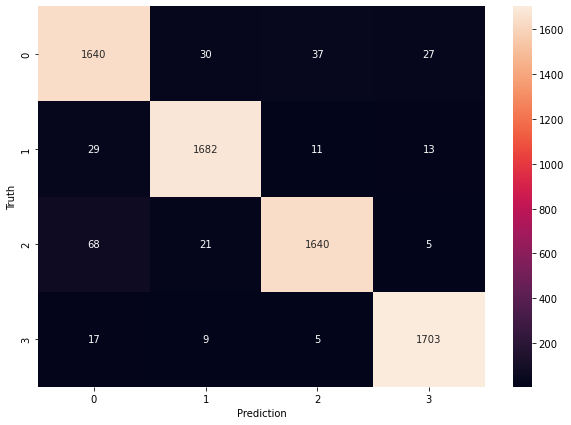

In [12]:
#PRINTING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [13]:
# NOW BY PREPROCESSING THE TEXT IN DESCRIPTION
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [14]:
df_balanced['preprocessed_txt'] = df_balanced['description'].apply(preprocess)

In [15]:
df_balanced.head( )

,label,description,Label,preprocessed_txt
14609,Household,Whirlpool 1.5 Ton 3 Star Inverter Split AC (Al...,0,whirlpool 1.5 Ton 3 Star Inverter Split AC Alu...
11256,Household,Singhal Homeware Stainless Steel Strainer - Mi...,0,Singhal Homeware Stainless Steel Strainer Micr...
5586,Household,Story@Home 6 Pieces 450 GSM Cotton Towel Set f...,0,Story@Home 6 Pieces 450 GSM Cotton Towel Set C...
15412,Household,Sameer 230mm Ventilation Exhaust Fan (Black) C...,0,Sameer 230 mm Ventilation Exhaust Fan Black Co...
14226,Household,Bosch Easy Aquatak 110 1300-Watt High Pressure...,0,Bosch Easy Aquatak 110 1300 Watt High Pressure...


In [16]:
# SPLITTING PREPROCESSED DATASET
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.Label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.Label
)

In [18]:
#PASSNG PREPROCESSED DATASET INTO THE RANDOMFOREST PIPELINE


# fit with X_train2 and y_train2
clf.fit(X_train2, y_train2)

#get the predictions for X_test2 and store it in y_pred2
y_pred2 = clf.predict(X_test2)


#print the classfication report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1734
           1       0.97      0.97      0.97      1735
           2       0.97      0.96      0.96      1734
           3       0.98      0.98      0.98      1734

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



Text(69.0, 0.5, 'Truth')

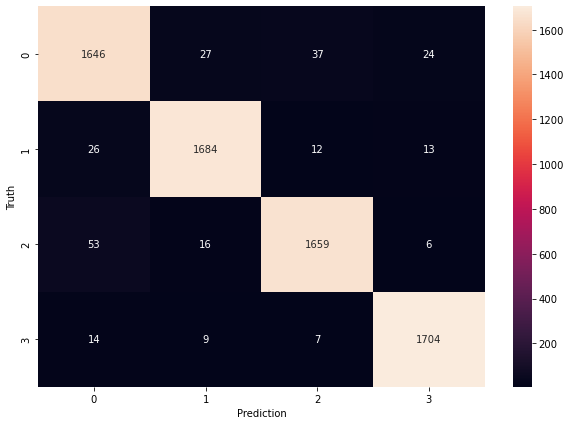

In [20]:
#PRINTING CONFUSION MATRIX
cm2 = confusion_matrix(y_test2, y_pred2)
cm2
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')